In [1]:
pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')



In [4]:
df=web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2019-12-17')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.540047
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.607436
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.747405
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.880667
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.860235
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,66.426819
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,66.596100
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,67.501350


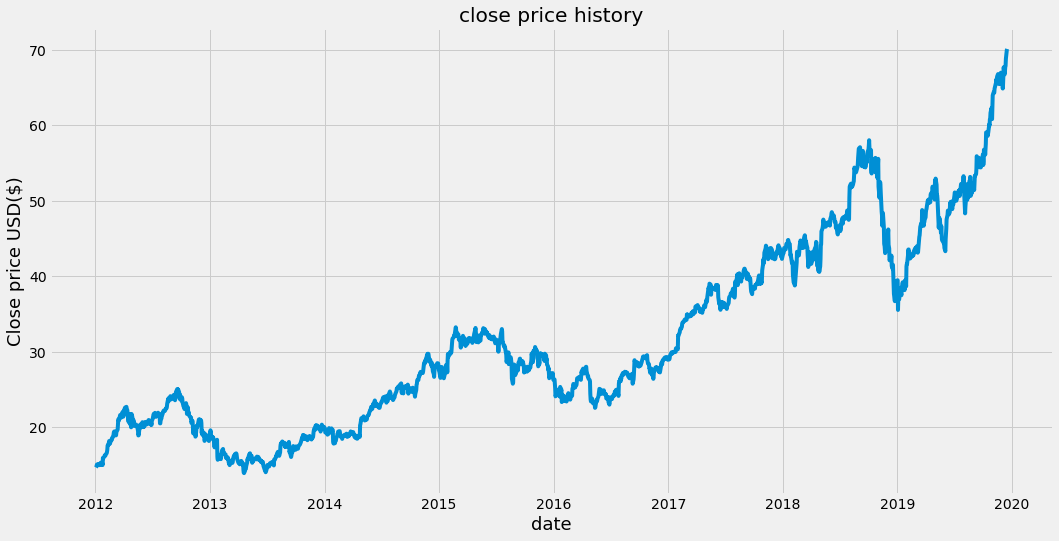

In [5]:
plt.figure(figsize=(16,8))
plt.title('close price history')
plt.plot(df['Close'])
plt.xlabel('date',fontsize=18)
plt.ylabel('Close price USD($)',fontsize=18)
plt.show()

In [6]:
data=df.filter(['Close'])
dataset=data.values
training_data_len=math.ceil(len(dataset)* .8)
training_data_len

1603

In [7]:
#scaling of data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [8]:
train_data=scaled_data[0:training_data_len,:]
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if(i<=60):
    print(x_train)
    print(y_train)
    print()

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]



In [11]:
x_train,y_train=np.array(x_train),np.array(y_train)
x_train
y_train

array([0.13949272, 0.13293563, 0.14507041, ..., 0.58926183, 0.58164901,
       0.58939538])

In [12]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape


(1543, 60, 1)

In [13]:
#building the lstm model
model=Sequential()
model.add(LSTM(50, return_sequences=True , input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))



In [14]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [39]:
model.fit(x_train,y_train,batch_size=1,epochs=5)


Epoch 1/5
1543/1543 [==============================] - 43s 28ms/step - loss: 3.5318e-04
Epoch 2/5
1543/1543 [==============================] - 43s 28ms/step - loss: 2.0297e-04
Epoch 3/5
1543/1543 [==============================] - 43s 28ms/step - loss: 2.0544e-04
Epoch 4/5
1543/1543 [==============================] - 43s 28ms/step - loss: 1.8277e-04
Epoch 5/5
1543/1543 [==============================] - 43s 28ms/step - loss: 1.4994e-04


In [28]:
test_data=scaled_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
len(x_test)

400

In [29]:
x_test=np.array(x_test)


In [30]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [31]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
len(predictions)


400

In [33]:
MSE = np.square(np.subtract(y_test,predictions)).mean() 
 
RMSE = math.sqrt(MSE)
RMSE

1.54951696739811

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


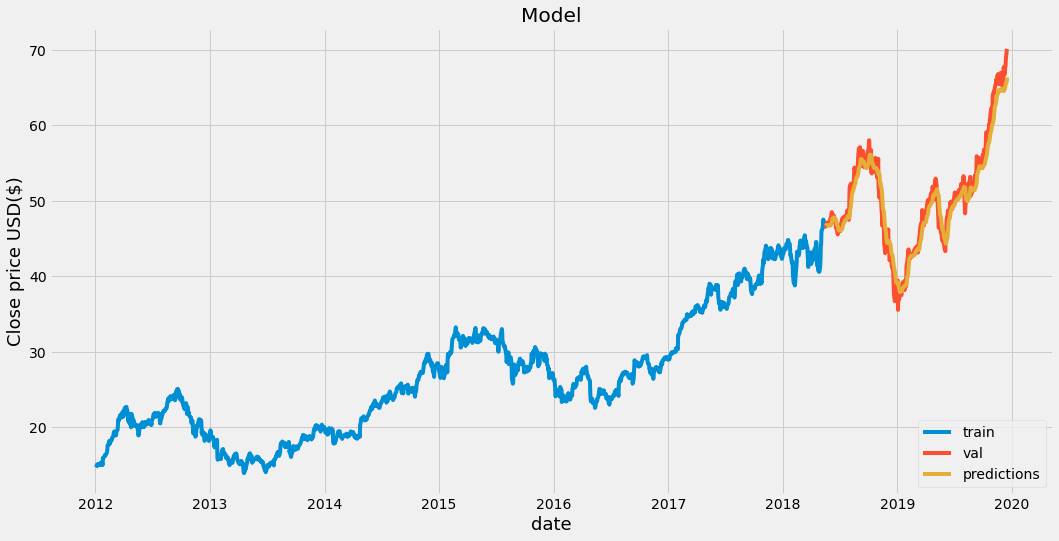

In [34]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('date',fontsize=18)
plt.ylabel('Close price USD($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['train','val','predictions'],loc='lower right')
plt.show()

In [35]:
#show the actual and predicted prices
valid 

,Close,predictions
Date,,
2018-05-17,46.747501,46.717918
2018-05-18,46.577499,46.762672
2018-05-21,46.907501,46.743305
2018-05-22,46.790001,46.737656
2018-05-23,47.090000,46.720261
...,...,...
2019-12-11,67.692497,65.047829
2019-12-12,67.864998,65.275078
2019-12-13,68.787498,65.513916


In [37]:
apple_quote=web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2019-12-17')
new_df=apple_quote.filter(['Close'])
last_60_days=new_df[-60:].values
last_60_days_transform=scaler.transform(last_60_days)
X_test=[]
X_test.append(last_60_days_transform)
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_price=model.predict(X_test)
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[[66.81555]]


In [38]:
apple_quote2=web.DataReader('AAPL',data_source='yahoo',start='2019-12-18',end='2019-12-18')
print(apple_quote2['Close'])

Date
2019-12-18    69.934998
Name: Close, dtype: float64
